# 04 Predicting from Data with Machine Learning in Python

<center><img src="figs/03_class_header.png" width=1050px alt="default"/></center>

### Feedback about the class!

https://forms.gle/GQfk59CJZnELZfJQ6

# Outline of ECE 3

- Unit 01: Welcome to Python
- Unit 02: Computing with Data in Python
- Unit 03: Summarizing Data in Python
- **Unit 04: Predicting from Data with Machine Learning in Python**

### Artificial Intelligence (AI)

Before defining machine learning, we need to define artificial intelligence. We will see that machine learning is a subfield of artificial intelligence.

$\color{#EF5645}{\text{Definition}}$: Artificial Intelligence (AI) represents the techniques that enable machines to mimic human intelligence.

$\color{#047C91}{\text{Example}}$: We can hard-code a chess strategy in a computer, by a decision tree deciding what is the best move for the computer given a situation on the board.



In May of 1997, Garry Kasparov sat down at a chess board in a Manhattan skyscraper. Kasparov was considered the best chess player of all times. He was playing with an AI called Deep Blue. Deep Blue was one of the world’s most powerful supercomputers, built by IBM with a specific goal in mind: to beat humanity at its own game. 

For IBM, billions of dollars worth of business clout was on the table, and to a certain extent, Kasparov was playing for the fate of chess itself. He had never lost a multi-game match in his entire career. Could a machine beat him? It did.

<center><img src="figs/04_deep_blue.png" width=420px alt="default"/></center>

### Machine Learning (ML)

Machine learning is a form of artificial intelligence that uses data.

$\color{#EF5645}{\text{Definition}}$: Machine Learning (ML) represents the techniques that enable machines to mimic human intelligence by learning from data.

$\color{#047C91}{\text{Example}}$: The computer has learned what is the next best move, by looking at millions of a given game: Chess... or Go.

$\color{#EF5645}{\text{Remark}}$: ML is therefore a sub-field of AI.

In March 2016, AlphaGo defeated the world Go champion. AlphaGo is a program that was trained to play the board game Go by looking at a huge number of Go games.

AlphaGo's victory was a major milestone. Go had previously been regarded as a hard problem in machine learning that was expected to be out of reach for the technology of the time.

AlphaGo had taught itself how to improve its game by playing millions of matches against itself, according to the head of the Google subsidiary that developed the software.


<center><img src="figs/04_alpha_go.png" width=550px alt="default"/></center>

### ML: Supervised Learning and Unsupervised Learning

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

### Supervised Learning in ML


$\color{#EF5645}{\text{Definition}}$: _Supervised learning_ refers to the task of learning a function that maps an input $X$ to an output $Y$ based on examples of input-outputs. The method is:
- a _classification_ if outputs are categorical, (e.g., predict if a patient has Alzheimer's from its MRI)
- a _regression_ if quantitative (e.g., predict the age of a patient from its MRI).

<center><img src="figs/03_sl2.png" width=900px alt="default"/></center>
<center>Supervised Learning</center>

### Unsupervised Learning in ML

$\color{#EF5645}{\text{Definition}}$: _Unsupervised learning_ refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the method is:
- a _clustering_: if we want to find groups (clusters), (e.g. find the different diseases that exist within one dataset of brain images),
- a _dimension reduction_: if we want to find the main sources of data variations (e.g., what are the main variations in the shape of a brain?)

<center>  </center>
<center><img src="figs/04_ai.png" alt="default" width=1900px/></center>


# Outline of 04: Predicting from Data

- **04: Predicting from Data with Machine Learning in Python**
  - **A. Clustering**
  - B. Linear Regression
  - C. Principal Component Analysis

### Understand the Fundamentals Behind Clustering

### Clustering: Goal (Intuition)

Clustering is an unsupervised machine learning approach, whose goal can be summarized as follows.

- Given: (i) $N$ $n$-vectors $x_1, . . . , x_N$ representing $N$ data points, (ii) integer $k$.
- $\color{#EF5645}{\text{Goal}}$:
  - Group/Cluster $N$ $n$-vectors into $k$ groups/clusters
  - _such that_: vectors in the same group are "close".

<center><img src="figs/04_clustering.jpg" alt="default" width=380px/></center>

$\color{#047C91}{\text{Exercise}}$: What is $k$ in the figure above? $n$? $N$?

### Examples of clustering

There are many real-worlds examples of the use of clustering.

- patient clustering 
  - $x_i$ is the brain image of patient $i$
- customer market "segmentation" (clustering)
  - $x_i$ is purchase history of customer $i$ 
- financial sectors clustering
  - $x_i$ are financial attributes of company $i$


### Clustering: Goal (Math)

Let's restate the goal of clustering using mathematics.

- For each group/cluster $j=1, ..., k$: 
  - Group $G_j$: Set of indices in $1, ..., N$ (data points)
  - Representative $z_j$: typical element of $G_j$.
- For each data point $i=1,...,N$: 
  - Assignment $c_i$: $x_i$ is in $G_{c_i}$

$\color{#EF5645}{\text{Goal}}$: Find $c_i$, $z_j$ to minimize 
$J = \frac{1}{N}\sum_{i=1}^N ||x_i - z_{c_i}||^2$
, i.e. the mean square distance from vectors to their representatives.


### K-means algorithm

The K-means algorithm is a way of performing clustering. Its main idea is given below.

- Alternate between:
  - (i) update groups, i.e., assignments $c_1, ..., c_N$, 
  - (ii) update representatives $z_1, ..., z_k$.
  
- Such that the objective $J$ decreases at each step.

<center><img src="figs/04_it0.png" alt="default"/></center>

<center><img src="figs/04_it1.png" alt="default"/></center>

<center><img src="figs/04_it2.png" alt="default"/></center>

<center><img src="figs/04_it3.png" alt="default"/></center>

<center><img src="figs/04_it5.png" alt="default"/></center>

### (i) Update the groups

We give details on each step of the algorithm. First, updating the groups.

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign to groups, i.e., choose $c_1, ..., c_N$
  - Assign each $x_i$ to its nearest representative. Justification:
    - Observe: 
      - $c_i$ only appears in $||x_i - z_{c_i}||^2$ in $J$
    - Conclude: to minimize over $c_i$, choose $c_i$ so $‖x_i − z_{c_i} ‖^2 = min_{j \in \{1, ..., k\}} ‖x_i − z_j ‖^2$.


### (ii) Update the representatives

Next, we give details on how we update the representatives.

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = mean of the points in group $j$. Justification:
    - Observe: $J$ splits as $J = J_1 + · · · + J_k$ with:
$$J_j = \frac{1}{N} \sum_{i \in G_j} ‖x_i − z_j ‖^2$$
    - Conclude: Choose $z_j$ to minimize its $J_j$: $z_j = \frac{1}{|G_j|} \sum_{i \in G_j} x_i$ = mean/center/centroid.



### Convergence of K-means

- How many times do we iterate these steps?
  - Until the $z_j$’s stop changing: 
    - = "convergence" of the algorithm.

# Pseudo-code



<center><img src="figs/04_kmeans.jpg" alt="default"/></center>


<center><img src="figs/04_conv.png" alt="default"/></center>

- $\color{#EF5645}{\text{Remarks}}$:
  - $J$ decreases at each step, 
  - but final clustering might not minimize $J$
    - it might only be a _local_ minimum.
    
- $\color{#EF5645}{\text{Recommendation}}$:
  - Run $k$-means 10 times, with different initial representatives
  - Take as final partition the one with smallest $J$

### MNIST Dataset: Find Digits

The MNIST dataset is arguably the most famous dataset from machine learning:

- MNIST images of handwritten digits (via Yann Lecun) 
- $60k$ images of size 28 × 28, reshaped as 784-vectors $x_i$

<center><img src="figs/04_mnist.png" alt="default" width=250px/></center>

- $\color{#EF5645}{\text{Goal}}$: Group these images into groups of same digit.
- $\color{#047C91}{\text{Exercice}}$: What are $k, N, n$?
- Implement it practice? Will be in your next homework!

### Connectome Dataset: Use Clustering to Find Diseases

White matter is referred to as the "highway of the brain", it transports the information.

$\color{#EF5645}{\text{Definitions}}$:
- Structural connectome: how areas are "structurally" connected
  - i.e. how many fiber tracks link two areas (shapes).
- Functional connectome: how areas are "functionally" connected
  - i.e. whether one area co-activates with another area.

$\color{#EF5645}{\text{Question}}$: Given functional connectomes of several subjects, we want to predict if a new subject has schizophrenia. We seek to train a machine learning algorithm by showing it several examples of connectomes with their labels: healthy or schizophrenic. What type of learning algorithm is this?

<center><img src="figs/03_white_tracks.jpeg" width=400px alt="default"/></center>

<center><img src="figs/03_parcellation.png" width=350px alt="default"/></center>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import geomstats.datasets.utils as data_utils

data, _, labels = data_utils.load_connectomes()
print(f"There are {len(data)} connectomes:"
      f" {sum(labels==0)} healthy controls and {sum(labels==1)} schizophrenic patients.") 

There are 86 connectomes: 46 healthy controls and 40 schizophrenic patients.


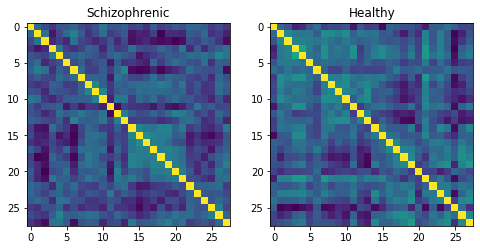

In [8]:
labels_str = ["Healthy", "Schizophrenic"]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
imgplot = ax.imshow(data[0]); ax.set_title(labels_str[labels[0]])
ax = fig.add_subplot(122)
imgplot = ax.imshow(data[1]); ax.set_title(labels_str[labels[1]])
plt.show()